In [111]:
# HOME
import os
import scipy
from plot import plot_genomic

home = '/Users/mahtin'
# home = '/Users/martinscience'
# standard paths
testdata = os.path.join(home,"Dropbox/Icke/Work/somVar/testdata")
static_path = os.path.join(home, "Dropbox/Icke/Work/static")
cluster_path = os.path.join(home, "mount")
tooldata = os.path.join(home, "Dropbox/Icke/Work/somVar/tooldata")

# tool-specific paths
shell_path = "../shell"
# 
cnvdata = os.path.join(tooldata, "myCNVdata")
output_path = os.path.join(cnvdata, "output")

# the path to the input data
cnv_path = os.path.join(cnvdata, "cnv")
cnvPON_path = cnv_path = os.path.join(cnvdata, "chromCov")
cnv_path = os.path.join(cluster_path, "scratch/develop/PONcoverage/cnv")
cnvPON_path = os.path.join(cluster_path, "scratch/develop/PONcoverage/chromCov")

ModuleNotFoundError: No module named 'plot'

In [2]:
cnvPON_path

'/Users/mahtin/mount/scratch/develop/PONcoverage/chromCov'

## get the coverage and SNP data

In [3]:
sample = "01_A"
snp_df = pd.read_csv(os.path.join(output_path, 'heteroSNP/01_A.snp'), sep='\t')
cov_df = pd.read_csv(os.path.join(output_path, 'covDif/01_A.cov'), sep='\t')

## CovDiv rolling window

In [4]:
cov_df[:10]

,Chr,Pos,FullExonPos,ExonPos,Coverage,PONmeanCov,PONmedianCov,PONstd,log2ratio
0,chr1,12650,220,220,0.066480,0.005664,0.000000,0.018137,3.552918
1,chr1,12700,270,270,0.149581,0.024506,0.000000,0.070519,2.609726
2,chr1,12750,320,320,0.831005,0.016357,0.000000,0.053281,5.666868
3,chr1,13450,365,365,23.068687,10.565648,10.013362,4.855861,1.126555
4,chr1,13500,415,415,29.420886,14.981521,14.981521,6.335329,0.973657
5,chr1,13550,465,465,34.227416,18.105937,17.754565,7.737376,0.918690
6,chr1,13600,515,515,34.132682,17.593200,17.593200,7.753357,0.956136
7,chr1,13650,565,565,28.210943,13.517399,13.517399,6.162109,1.061437
8,chr1,14700,606,606,27.911782,14.335685,14.002403,5.515341,0.961263
9,chr1,14750,656,656,30.841904,16.343617,16.778470,6.290739,0.916165


### try rolling window for log2ratio


#### compute the mean for log2ratio
+ the rolling should be performed on coverage data filtered for:
    * minimal coverage
    * minimal coverage in PON samples
    * maximal std of PON coverage

In [5]:
# set the limits
min_cov = 20
min_PON_cov = 20
max_PON_std = 100
window_size = 100

cov_df.loc[:,'log2ratiomean'] = cov_df.query('Coverage >= @min_cov and PONmeanCov >= @min_PON_cov and PONstd < @max_PON_std')['log2ratio'].rolling(window_size).mean()
cov_df[200:220]

,Chr,Pos,FullExonPos,ExonPos,Coverage,PONmeanCov,PONmedianCov,PONstd,log2ratio,log2ratiomean
200,chr1,943800,13181,13181,88.525255,57.541919,57.541919,14.929468,0.621476,NaN
201,chr1,943850,13231,13231,100.742685,67.771265,68.714274,17.349866,0.571929,NaN
202,chr1,943900,13281,13281,105.633977,76.548689,76.548689,18.701392,0.464624,0.249035
203,chr1,943950,13331,13331,107.772983,86.359886,86.359886,19.647877,0.319562,0.249131
204,chr1,944000,13381,13381,123.384235,108.787847,111.503520,21.584491,0.181641,0.247663
205,chr1,944050,13431,13431,147.187530,137.808461,141.044461,23.355099,0.094991,0.244829
206,chr1,944100,13481,13481,152.324800,144.026487,144.026487,22.362912,0.080817,0.240676
207,chr1,944150,13531,13531,121.752142,111.278495,110.814904,16.345873,0.129772,0.233675
208,chr1,944750,13577,13577,65.935227,84.295650,85.349534,15.281026,-0.354409,0.219062
209,chr1,944800,13627,13627,96.281852,129.868272,129.868272,24.754666,-0.431713,0.203626


### visualize the data

In [6]:
import matplotlib as mpl
import matplotlib.pyplot as plt
# use seaborn plotting defaults
import seaborn as sns; sns.set()
from matplotlib.collections import PatchCollection
from matplotlib.patches import Rectangle


In [106]:
def sort_df(df):
    '''
    helper for sorting dfs for chromosomes
    '''
    df2 = df.copy()
    # make Chr column categorical for sorting .. and sort
    chrom_list = [f"chr{i+1}" for i in range(22)] + ['chrX']
    df2['Chr'] = pd.Categorical(df2['Chr'], chrom_list)
    return df2.sort_values(['Chr', 'FullExonPos'])


def get_chrom_df(df):

    # dropna is neccessary because grouping on categorical returns all categories
    chrom_df = df.groupby('Chr')['FullExonPos'].agg(['mean', 'min', 'max']).dropna()
    cols = list(chrom_df.columns)
    chrom_df['sum'] = chrom_df['max'] - chrom_df['min']
    chrom_df['cummin'] = chrom_df['sum'].cumsum()
    chrom_df['dif'] = (chrom_df['max'] - chrom_df['cummin']).astype(int)
    for col in cols:
        chrom_df[col] = (chrom_df[col] - chrom_df['dif']).astype(int)
    cols.append('dif')
    return chrom_df.loc[:, cols]


def make_color_chroms(ax, chrom_df, color_chroms, ylimits=(-10,10), colormap='coolwarm_r'):
    
    # set the cmap from provided argument
    cmap = plt.cm.get_cmap(colormap, 23)
    
    # build the rects
    rects = []
    # set the height and ymin beyond the ylimits so borders are not seen
    ymin = ylimits[0] * 1.1
    height = (ylimits[1] - ymin) * 1.1
    
    for chrom in chrom_df.index:
        row = chrom_df.loc[chrom]
        rect = Rectangle((row['min'], ymin), width=row['max']-row['min'], height=height)
        rects.append(rect)

    if color_chroms:
        rect_kwargs = dict(
            alpha=.6,
            ec='none'
        )
    else:
        rect_kwargs = dict(
            alpha=1,
            fc='none',
            ec='darkgray',
            lw=1,
            ls='-'
        )
    # set the rectangle collection with colormap
    rect_collection = PatchCollection(rects, cmap=cmap, **rect_kwargs)
    # set the index for the color map from chrom integers
    rect_collection.set_array(chrom_df.index.str.replace('chr', '').str.replace('X', '23').astype(int))
    return ax.add_collection(rect_collection)


def add_chrom_labels(ax, chrom_df, ylimits=(-10,10)):
    
    # YOFFSET is the upper-relative y-position 
    YOFFSET = 0.9
    # get the min_chrom_fraction from minimum chrom_size / whole stretch
    min_chrom_frac = (chrom_df['max'] - chrom_df['min']).min() / chrom_df['max'].max()
    chrom_size = min(50, max(15, 200*min_chrom_frac))
    style = dict(size=chrom_size, color='#2f3832')
    # set the height and ymin beyond the ylimits so borders are not seen
    ypos = ylimits[0] + YOFFSET * (ylimits[1] - ylimits[0])
    for chrom, row in chrom_df.iterrows():
        if (len(chrom_df.index) > 12):
            chrom = chrom.replace('chr', '')
        ax.text(row['mean'], ypos, chrom, ha='center', **style)
    

def make_nice(position):
    '''
    takes position and returns closest multiple of 1, 2, 5 or 10
    '''
    # set nice values
    nice_positions = np.array([1,2,2.5,5,10])
    # get the 10s
    power10 = np.power(10, np.floor(np.log10(position)))
    # reduce to value between 1 and 10
    num = position / power10
    # find the closest nice position
    base = nice_positions[np.argmin(np.abs(nice_positions / num - 1))]
    return base * power10

def get_tick_pos(tick_dist, chrom_df):
    '''
    return from chrom_df the evenly-spread (tick_dist) positions per chrom
    '''
    return [pos for _, row in chrom_df.iterrows() for pos in range(row['min'] + tick_dist, row['max'], tick_dist)]


def str_pos(pos, df, precision=1):
    '''
    returns string representation of base position
    on genomic coords
    '''
    pos = df.iloc[np.argmin(np.abs(df['PlotPos'] - pos))]['Pos']
    # get the closest base power
    power10 = int(np.round(np.log10(pos) / 3) * 3)
    # get the base fraction
    base = pos / np.power(10, power10)
    if power10 == 9:
        base = base * 1000
        power10 = 6
    if power10 == 6:
        suff = 'Mb'
    elif power10 == 3:
        suff = 'kb'
    base = round(base,precision)
    if power10 == 0:
        suff = 'b'
        base = int(base)
    return f"{base}{suff}"


def set_ticks(ax, df, chrom_df, ticks=20):
    '''
    for a given tick number, set nicely spread ticks
    '''
    
    ## determine optimale tick distance
    # get the chrom_number
    chrom_count = len(chrom_df.index)
    # get the number of bases
    stretch = chrom_df['max'][-1]
    # set the number of desired ticks
    major_tick_dist = int(stretch / (ticks + 1))
    minor_tick_dist = int(stretch / ((ticks * 2) + 1))
    
    # feed tick distance into chrom_df to get chrom-specific coords
    major_pos = get_tick_pos(major_tick_dist, chrom_df)
    minor_pos = [pos - minor_tick_dist for pos in major_pos]
    
    ax.xaxis.set_major_locator(plt.FixedLocator(major_pos))
    # only print the genomic coords below a certain base total
    if stretch < 1e8:
        major_labels = [str_pos(pos, df) for pos in major_pos]
        ax.xaxis.set_major_formatter(plt.FixedFormatter(major_labels))
    else:
        ax.xaxis.set_major_formatter(plt.NullFormatter())
    ax.xaxis.set_minor_locator(plt.FixedLocator(minor_pos))
    ax.xaxis.grid(which='major', linestyle='-', linewidth=2)
    ax.xaxis.grid(which='minor', linestyle='--', linewidth=1)
    ax.xaxis.set_tick_params(which='major', length=20, )
    
    # set the tick labels
    for tick in ax.xaxis.get_majorticklabels():
        tick.set_verticalalignment("bottom")
    return ax


def extract_pos(region):
    
    def convert(pos):
        if pos.endswith('Mb'):
            pos = int(pos.replace('Mb', '')) * 1e6
        elif pos.endswith('kb'):
            pos = int(pos.replace('kb', '')) * 1000
        else:
            pos = int(pos)
        return pos
    
    split = region.split(':')  
    chrom = split[0]
    
    # if start and are used
    if len(split) > 1 and '-' in split[1]:     
        se = split[1].split('-')
        start = convert(se[0])
        end = convert(se[1])
    else:
        start = 0
        end = 1e10
    return chrom, start, end
    

def plot(df, plots, chroms='all', color_chroms=True, colormap='coolwarm_r', region='', figsize=(20,4)):
    
    #### DATA MANGELING ##########
    # get cols for rearranging
    org_cols = list(df.columns)
    
    # sort the df
    df = sort_df(cov_df)
    # reduce the df to the selected chromosomes
    if region:
        chrom, start, end = extract_pos(region)
        df = df.query('Chr == @chrom and @start <= Pos <= @end')
    elif chroms != 'all':
        df = df.query('Chr in @chroms')

    # get the chrom_df for collapsing the 
    chrom_df = get_chrom_df(df)
    
    df = df.merge(chrom_df.loc[:, 'dif'], on='Chr')
    df['PlotPos'] = df['FullExonPos'] - df['dif']
    
    # rearrange the df as return value
    new_cols = org_cols[:4] + ['PlotPos'] + org_cols[4:]
    df = df.loc[:, new_cols]
    
    
    
    
    
    ######## PLOTTING #######
    # plot the figure
    fig, ax = plt.subplots(figsize=figsize)

    # set the x-axis limits
    _ = ax.set_xlim(0, df['PlotPos'].max())
    
    # plot the graphs #######
    for plot in plots:
        if plot['plot_type'] == 'line':
            plot = ax.plot(df['PlotPos'],df[plot['data']], **plot['plot_args'])
        elif plot['plot_type'] == 'scatter':
            plot = ax.scatter(df['PlotPos'],df[plot['data']], **plot['plot_args'])
    
    _ = ax.set_ylim(-1.5, 2.5)
    # add the color chroms
    _ = make_color_chroms(ax, chrom_df, color_chroms, ylimits=ax.get_ylim(), colormap=colormap)
    
    
    ######## LABELS ###################
    # set the axis labels
    _ = ax.set_xlabel('genomic coords');
    # quick fix for one y-label
    _ = ax.set_ylabel(' / '.join([plot['title'] for plot in plots]))
    
    ######## CHROM LABELS #############
    add_chrom_labels(ax, chrom_df, ax.get_ylim())
    
    ####### X-AXIS ####################
    # set major ticks and grid for chrom
    
    ax = set_ticks(ax, df, chrom_df)
    
    # return fig and ax for further plotting and return edited dataframe
    return fig, ax, df, chrom_df


In [109]:
plots = [
    dict(
        title='rollinglog2ratio',
        plot_type='line',   # ['line', 'scatter']
        data='log2ratiomean',
        plot_args=dict(
            linewidth=0.3,
            color='black',
            alpha=.7
        )
    ),
    dict(
        title='log2ratio',
        plot_type='scatter',   # ['line', 'scatter']
        data='log2ratio',
        plot_args=dict(
            linewidth=0.3,
            color='black',
            s=0.1,
            alpha=.3
        )
    )
]

chroms = ['chr5', 'chr7','chr8', 'chr11', 'chr17']

fig_params = dict(
    figsize=(24,8),
    colormap='coolwarm_r',
    color_chroms=True
)

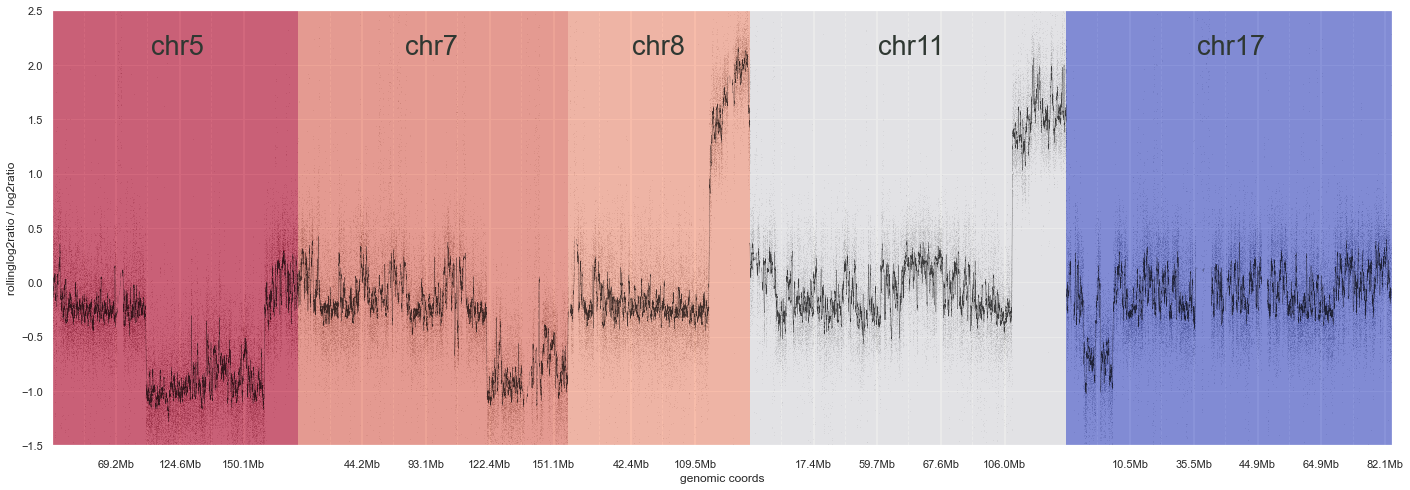

In [110]:
fig, ax, df, chrom_df = plot(cov_df, plots=plots, chroms=chroms, region='', **fig_params)

#### test interpolation of missing values

In [ ]:
# use per chromosome
# set FullExonPos as index for the interpolation method to work on proper intervals
test = cov_df.query('Chr == "chr1"').set_index('FullExonPos')
test[240:300]

In [ ]:
test['interpol'] = test['log2ratiomean'].interpolate(method='values', limit=10, limit_direction='both')
test[240:300]

## heteroSNP rolling window
### first, get a few extra values to do rolling windows on

In [ ]:
def expand_SNPdata(snp_df, config):
    '''
    retrieve a few data columns locally to use rolling windows on
    this needs to be done chromosome-wise in order to avoid gap effects
    '''
    
    # reduce the snp_df using config limits
    VAFmin = config['VAFlimits'][0]
    VAFmax = config['VAFlimits'][1]
    minDepth = config['minDepth']
    minEBscore = config['minEBscore']
    df = snp_df.query('@VAFmin < VAF < @VAFmax and Depth >= @minDepth and EBscore > @minEBscore')
    
    # find the center
    center = df['VAF'].mean()
    print("heteroSNP centered around", center)
    # offCenter
    df.loc[:,'absVAF'] = np.abs(df['VAF'] - center)
    
    
    # get the local VAF difference chrom based
    dfs = []
    for chrom in df['Chr'].unique():
        chrom_df = df.query('Chr == @chrom')
        chrom_df['deltaVAF'] = np.abs(chrom_df['VAF'] - chrom_df.shift(1)['VAF']).fillna(0)
        dfs.append(chrom_df)
    snp_df = pd.concat(dfs).sort_values('FullExonPos')
    
    return snp_df

In [ ]:
config = {
    'heteroSNP': {
        'VAFlimits':[0.05,0.95],
        'normalize': True,
        'windows': {
            'absVAF': {
                'sum': 20
            },
            'VAF': {
                'std': 20
            },
            'deltaVAF': {
                'std': 20
            }
        },
        'minEBscore':0.5,
        'minDepth': 30,
    },
    'coverage': {
        'VAFlimits':[0.05,0.95],
        'normalize':False,
        'windows': {
            'log2ratio': {
                'mean':500
            },
            'Coverage': {
                'mean':500
            },
            'PONmeanCov': {
                'mean': 500
            }
        }
    }
}

snp_df = expand_SNPdata(snp_df, config['heteroSNP'])
snp_df

In [ ]:
def get_cols(col, agg='mean', modes=['L', 'R', 'Diff', '']):
    '''
    creates for each col a dict for looped computation
    {'L': 'VAVsumL', 'R': 'VAVsumR', 'Diff': 'VAVsumDiff', '': 'VAFsum'}}
    '''
    cols = {mode: col + agg + mode for mode in modes}
    return cols


def get_rolling_metrix_chrom(df, col='VAF', agg='sum', chrom='', window_size=20):
    '''
    take a column and produce rolling windows from it for each chromosome
    '''
    
    df = df.query('Chr == @chrom')
    cols = get_cols(col, agg)
    
    # get the right computation
    if agg =='std':
        df.loc[:, cols['L']] = df.rolling(window_size)[col].std()
    if agg == 'sum':
        df.loc[:, cols['L']] = df.rolling(window_size)[col].sum()
    if agg == 'mean':
        df.loc[:, cols['L']] = df.rolling(window_size)[col].mean()

    
    # get the right window by shifting the left
    df.loc[:, cols['R']] = df.shift(-window_size + 1)[cols['L']]
    # fillup the margins
    df.loc[:, cols['L']] = df[cols['L']].fillna(method='bfill')
    df.loc[:, cols['R']] = df[cols['R']].fillna(method='ffill')
    return df


def get_rolling_metrix(df, col='VAF', agg='mean', window_size=20, normalize=True):
    '''
    wrapper to apply get_rolling_metrix_chrom per chromosome
    '''
    
    chrom_dfs = []
    for chrom in df['Chr'].unique():
        chrom_df = get_rolling_metrix_chrom(df, col=col, agg=agg, chrom=chrom, window_size=window_size)
        chrom_dfs.append(chrom_df)
    df = pd.concat(chrom_dfs).sort_values('FullExonPos')
    
    cols = get_cols(col, agg)
    if normalize:
    # normalize the data
        print('Normalizing data')
        _min = df[cols['L']].min()
        _max = df[cols['L']].max()
        for side in ['L', 'R']:
            c = cols[side]
            df[c] = (df[c] - _min) / (_max - _min)
    # get the Diff
    df[cols['Diff']] = ((df[cols['L']] - df[cols['R']]) / 2) + 0.5
    df[cols['']] = df[cols['L']] * df[cols['Diff']] + df[cols['R']] * (1 - df[cols['Diff']])
    return df


def rolling_it(df, config):
    
    windows = config['windows']
    for col in windows.keys():
        for agg in windows[col].keys():
            window_size = windows[col][agg]
            print(f"Computing rolling window for {agg} of {col} with window size {window_size}")
            df = get_rolling_metrix(df, col=col, agg=agg, window_size=window_size, normalize=config['normalize'])
    return df

In [ ]:
rollingSNP_df = rolling_it(snp_df, config['heteroSNP'])
rollingSNP_df

In [ ]:
cov_df = rolling_it(cov_df, config['coverage'])

In [ ]:
def add_rolling_data(snp_df, cov_df, config):
    '''
    add the rolling metrices needed to get local data
    '''
    
    # add extra cols to snp_df
    snp_df = expand_SNPdata(snp_df, config['heteroSNP'])
    
    # get the rolling metrices for snp_df
    snp_df = rolling_it(snp_df, config['heteroSNP'])
    # get the rolling metrices for cov_df
    cov_df = rolling_it(cov_df, config['coverage'])
    
    return snp_df, cov_df

In [ ]:
snp_df, cov_df = add_rolling_data(snp_df, cov_df, config)

In [ ]:
snp_df.to_csv(os.path.join(output_path, 'heteroSNP/01_A.snp'), sep='\t', index=False)
cov_df.to_csv(os.path.join(output_path, 'covDif/01_A.cov'), sep='\t', index=False)